In [1]:
using Pkg
Pkg.add(["PyPlot","UMAP","LinearAlgebra","Distributions","Random","Flux","Zygote","SpecialFunctions","StatsBase","BoltzmannMachines","Statistics"])
Pkg.add(url="https://github.com/ssehztirom/LogLinearModels.jl")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/Users/moritz/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/moritz/Manifest.toml:0
    Updating git-repo `https://github.com/ssehztirom/LogLinearModels.jl`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [2]:
using PyPlot
using UMAP
using LinearAlgebra
using Distributions
using Random
using Flux
using Zygote
using SpecialFunctions
using LogLinearModels
using StatsBase
using BoltzmannMachines
using Statistics

In [3]:
include("patternextractor.jl")

makeconstraint (generic function with 2 methods)

# Code for training VAEs

In [4]:
# Principal component analysis (PCA)

function standardize2(x)
    (x .- mean(x, dims = 1)) ./ std(x, dims = 1)
end

function prcomps(mat, standardizeinput = true)
    if standardizeinput
        mat = standardize2(mat)
    end
    u,s,v = svd(mat)
    prcomps = u * Diagonal(s)
    return prcomps
end


struct VAE
	encoder
	mu
	logsigma
	decoder
end

# struct XYZ
#    encoder

function bernoulliloss(xhat,x)
	ce(x,y) =  y * log(x + eps()) + (1 - y) * log(1 - x + eps())
	# logpdf(b::Bernoulli,y::Bool) = y * log(b.p + eps()) + (1-y) * log(1-b.p + eps())
	# return sum(Distributions.logpdf.(Bernoulli.(xhat),x))
	return sum(ce.(xhat,x))
end

    
function normalz(mu,logsigma)
	return mu  + exp(logsigma) * randn()
end



function kullbackleiblerqp(mu,logsigma)
	return 0.5 * sum(exp.(2 .* logsigma) + mu.^2 .- 1 .- 2 .* logsigma)
end


g(x) = (h = vae.encoder(x); (vae.mu(h), vae.logsigma(h)))	

loss(x) = ((mu,logsigma) = g(x);
    (sum(bernoulliloss(vae.decoder(normalz.(mu,logsigma)),x))
        - Beta * kullbackleiblerqp(mu,logsigma)) / batchsize)

loss (generic function with 1 method)

In [5]:
function posteriorsample(x) 
    mu,logsigma = g(x)
    zs = normalz.(mu, logsigma)
    muz = vae.decoder(zs)
    return zs, muz
end

function priorsample(x) 
    mu,logsigma = g(x)
    mu = zeros(length(mu))
    logsigma = zeros(length(logsigma))
    zs = normalz.(mu, logsigma)
    muz = vae.decoder(zs)
    return zs, muz
end

priorsample (generic function with 1 method)

# Code for simulated data

In [6]:
n = 250
a = 2
b = -2

-2

In [7]:
g1c1z1 = rand(Normal(a,1),n)
g1c2z1 = rand(Normal(b,1),n)
g1c1z2 = rand(Normal(a,1),n)
g1c2z2 = rand(Normal(a,1),n)

g2c1z2 = rand(Normal(a,1),n)
g2c2z2 = rand(Normal(b,1),n)
g2c1z1 = rand(Normal(a,1),n)
g2c2z1 = rand(Normal(a,1),n)


250-element Vector{Float64}:
 0.7501158762518896
 2.5424213240333935
 1.4628604736121298
 3.072224592108917
 1.416468053235124
 0.6737214603660544
 2.5472244667238204
 0.8242522197520006
 2.330643431984151
 0.05573450317421713
 1.1953318306911644
 1.4415379043606265
 2.4682511379127434
 ⋮
 1.4387732076180582
 0.7851459552721636
 3.0306382222467367
 2.0947669630657892
 2.66436971306998
 0.47745269554095215
 2.5116656809684583
 2.0956550040049224
 1.8401466305024032
 0.07360576328810464
 1.9304679351646636
 0.20459830434857373

In [8]:
z1 = cat([g1c1z1,g1c2z1,g2c1z1,g2c2z1]...,dims=1)
z2 = cat([g1c1z2,g1c2z2,g2c1z2,g2c2z2]...,dims=1)

1000-element Vector{Float64}:
  1.5303118171576517
  2.021559776956367
  2.92775578801163
  1.3756674665850934
  2.070579071805939
  2.968434597886117
  2.223125736383711
  1.976576149308692
  1.32412769327706
  0.36295115886447116
  1.807455272324991
  3.126678069201292
  2.7964932615656526
  ⋮
 -0.7954448336446882
 -0.33221573255941284
 -2.5877431291462023
 -1.3599720998054425
 -1.821427804375215
 -1.307553681795516
 -2.4124213587406103
 -2.530504576177547
 -2.4049530909722003
 -0.7253423661112997
 -0.940770272179964
 -1.9315393171020538

In [9]:
cellfactor = cat([fill(1,n),fill(2,n),fill(1,n),fill(3,n)]...,dims=1)
groupfactor = cat([fill(1,n*2),fill(2,n*2)]...,dims=1)

1000-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [10]:
col = ["r","deepskyblue"]
gcols = col[groupfactor]
col = ["r", "deepskyblue", "lime"]
ccols = col[cellfactor]

1000-element Vector{String}:
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 "r"
 ⋮
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"
 "lime"

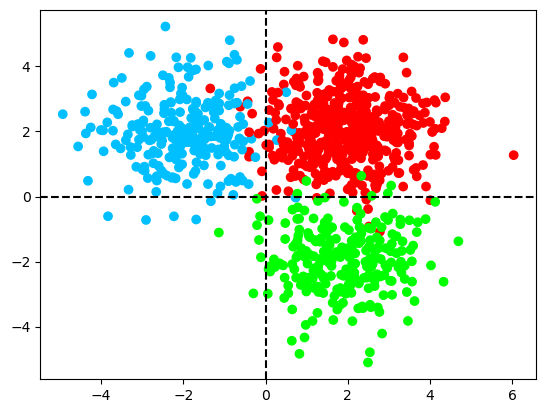

PyObject <matplotlib.lines.Line2D object at 0x16c03abb0>

In [11]:
PyPlot.scatter(z1,z2,c=ccols)
PyPlot.axhline(y = 0.0,c="black",linestyle="--")
PyPlot.axvline(x = 0.0,c="black",linestyle="--")

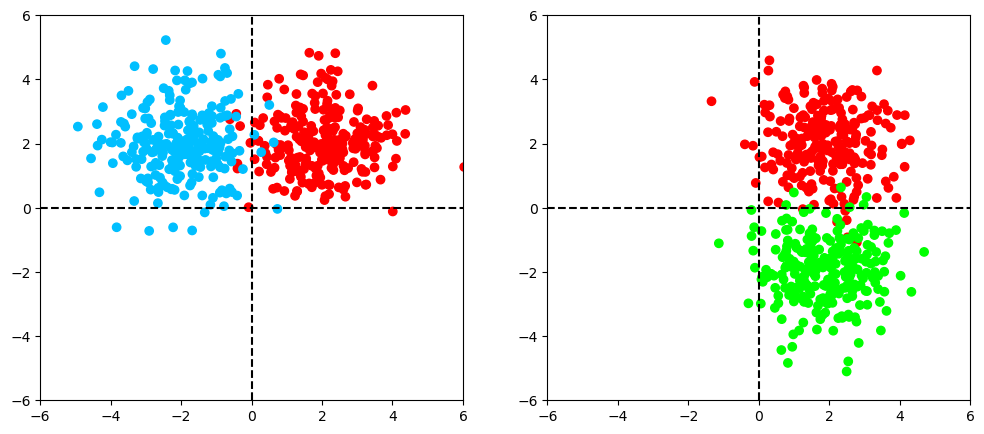

PyObject <matplotlib.lines.Line2D object at 0x183a5c550>

In [12]:
fig, ax = PyPlot.subplots(nrows=1, ncols=2, figsize=(12, 5))
g1i = groupfactor .== 1
ax[1].scatter(z1[g1i],z2[g1i],c=ccols[g1i])
ax[1][:set_ylim]([-6,6])
ax[1][:set_xlim]([-6,6])
ax[1].axhline(y = 0.0,c="black",linestyle="--")
ax[1].axvline(x = 0.0,c="black",linestyle="--")
g2i = groupfactor .== 2
ax[2].scatter(z1[g2i],z2[g2i],c=ccols[g2i])
ax[2][:set_ylim]([-6,6])
ax[2][:set_xlim]([-6,6])
ax[2].axhline(y = 0.0,c="black",linestyle="--")
ax[2].axvline(x = 0.0,c="black",linestyle="--")

In [13]:
x = zeros(n*4,10)

1000×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.

In [14]:
for i=1:5
    x[:,i] = z1 + rand(Normal(0,1),n*4)
end

In [15]:
for i=6:10
    x[:,i] = z2 + rand(Normal(0,1),n*4)
end

In [16]:
x01 = convert(Array{Float64,2},ifelse.(x.>0,1,0))

1000×10 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮                   
 1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.

In [17]:
noisevars = convert(Array{Float64,2},rand(1000,20) .> 0.5)

1000×20 Matrix{Float64}:
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0     0.0  1.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0     0.0  0.0  1.0  0.0  1.0  1.0  1.0
 1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  1.0  0.0  1.0  0.0  1.0  0.0
 1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  …  1.0  0.0  1.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0     1.0  0.0  1.0  1.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0  1.0  1.0  0.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0     0.0  0.0  1.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  …  0.0  1.0  1.0  1.0  1.0  0.0  1.0
 1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  1.0  1.0  0.0  1.0  0.0  1.0
 1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0

In [18]:
x01 = hcat([x01,noisevars]...)

1000×30 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  1.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0     0.0  0.0  1.0  0.0  1.0  1.0  1.0
 0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  0.0  1.0  0.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  0.0  1.0  0.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  0.0  1.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  1.0  1.0  0.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  1.0  0.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  1.0  1.0  1.0  1.0  0.0  1.0
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     0.0  1.0  1.0  0.0  1.0  0.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

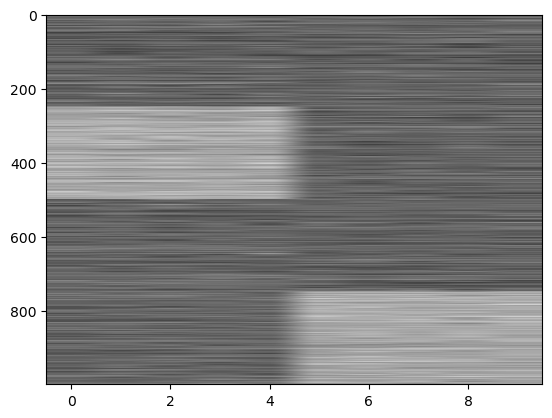

PyObject <matplotlib.image.AxesImage object at 0x183ae0130>

In [19]:
PyPlot.imshow(x,aspect="auto",cmap="binary")

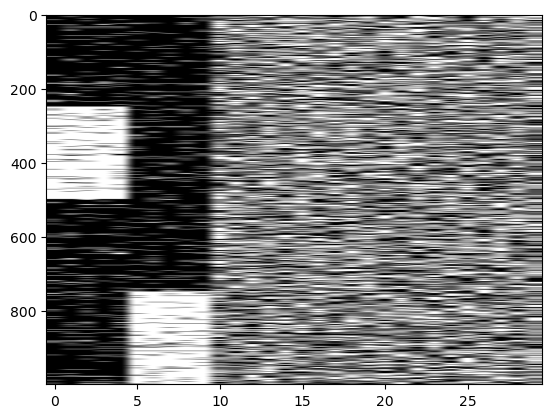

PyObject <matplotlib.image.AxesImage object at 0x183b39070>

In [20]:
PyPlot.imshow(x01,aspect="auto",cmap="binary")

## Simulated Data Ready, prepare for training VAE

In [21]:
n,p = size(x01)

(1000, 30)

In [22]:
randindex = Random.randperm(n);
trainidx = randindex[1:Int(round(.632*n))];
testidx = randindex[Int(round(.632*n))+1:n];
testdata = [x01[i,:]' for i in Iterators.partition(testidx,1)]; 
evalvae() = (push!(losslist,sum(lossplus.(testdata[1:10],testys[1:10]))))#;println(sum(x->sum(x.^2),Flux.params(vae.decoder))))

evalvae (generic function with 1 method)

In [23]:
testdata

368-element Vector{Adjoint{Float64, Matrix{Float64}}}:
 [0.0; 0.0; … ; 0.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 1.0;;]
 [1.0; 1.0; … ; 1.0; 0.0;;]
 [1.0; 1.0; … ; 0.0; 0.0;;]
 [1.0; 0.0; … ; 0.0; 1.0;;]
 [0.0; 1.0; … ; 1.0; 1.0;;]
 [0.0; 0.0; … ; 0.0; 0.0;;]
 [1.0; 1.0; … ; 0.0; 0.0;;]
 [1.0; 1.0; … ; 1.0; 1.0;;]
 [0.0; 0.0; … ; 0.0; 0.0;;]
 [1.0; 1.0; … ; 1.0; 0.0;;]
 [1.0; 1.0; … ; 0.0; 0.0;;]
 ⋮
 [0.0; 0.0; … ; 1.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 0.0;;]
 [1.0; 1.0; … ; 1.0; 0.0;;]
 [1.0; 0.0; … ; 1.0; 0.0;;]
 [0.0; 0.0; … ; 1.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 1.0;;]
 [1.0; 1.0; … ; 1.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 1.0;;]
 [1.0; 0.0; … ; 1.0; 0.0;;]
 [0.0; 0.0; … ; 1.0; 0.0;;]
 [1.0; 1.0; … ; 1.0; 1.0;;]
 [1.0; 1.0; … ; 0.0; 0.0;;]

In [24]:
col = ["lightgrey","k"]
gcols = col[groupfactor[testidx]]
col = ["r", "deepskyblue", "lime"]
ccols = col[cellfactor[testidx]]

368-element Vector{String}:
 "deepskyblue"
 "r"
 "r"
 "r"
 "r"
 "lime"
 "lime"
 "r"
 "r"
 "lime"
 "deepskyblue"
 "r"
 "lime"
 ⋮
 "deepskyblue"
 "r"
 "lime"
 "lime"
 "deepskyblue"
 "lime"
 "r"
 "r"
 "deepskyblue"
 "deepskyblue"
 "r"
 "r"

# Train VAE

In [25]:
Random.seed!(1234)
Dh = 30
Dz = 2
epochs = 50
learningrate = 0.004
batchsize=10
Beta =1

1

In [26]:
loss(x) = ((mu,logsigma) = g(x);
    (sum(bernoulliloss(vae.decoder(normalz.(mu,logsigma)),x))
        - Beta * kullbackleiblerqp(mu,logsigma)) / batchsize)

loss (generic function with 1 method)

In [27]:
Random.seed!(1234)
vae =  VAE(Flux.Chain(Flux.Dense(p,Dh,tanh)),
    Flux.Dense(Dh,Dz),
    Flux.Dense(Dh,Dz),
    Flux.Chain(Flux.Dense(Dz,Dh,relu),Flux.Dense(Dh,p,sigmoid)))

VAE(Chain(Dense(30, 30, tanh)), Dense(30, 2), Dense(30, 2), Chain(Dense(2, 30, relu), Dense(30, 30, σ)))

In [28]:
optimizer = ADAM(learningrate)
vaeparams = Flux.params(vae.encoder,vae.mu,vae.logsigma,vae.decoder)

Params([Float32[-0.21166883 -0.036679838 … -0.09168885 0.094487116; 0.050509237 0.23434964 … 0.27464327 -0.031743303; … ; -0.02800931 -0.13444553 … 0.2145687 0.22609095; 0.1939767 0.22877489 … -0.16312665 0.2823618], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.23465197 0.22051999 … 0.07838469 -0.034903724; 0.21626312 0.045496177 … -0.36964485 0.0015206997], Float32[0.0, 0.0], Float32[-0.42893928 0.370592 … 0.11676181 -0.32878834; 0.25255343 -0.03477674 … 0.225178 0.16739601], Float32[0.0, 0.0], Float32[0.1933963 0.06880604; 0.36454853 0.33934513; … ; 0.34757817 0.2702324; 0.3253124 0.11031515], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.14380309 -0.3017917 … 0.063717805 -0.0048677; 0.09285279 -0.01082798 … -0.13923407 0.11875712; … ; -0.31188414 0.052131128 … -0.29600835 0.16998582; 0.1445122 0.17016178 … -0.30094182 0.26255414], 

Write a custom training loop

In [29]:
losslist = []
for i = 1:25
    traindata = [x01[i,:]' for i in Iterators.partition(trainidx, batchsize)][1:(end-1)]
    idx = 0
    for x = traindata 
        idx += 1
            #println(ys)
            batch_loss, back = Flux.pullback(vaeparams) do
            -loss(x)
            end
            push!(losslist,batch_loss)
            grad = back(1f0)
            Flux.Optimise.update!(optimizer, vaeparams, grad)
    end
end


# Check output from VAE

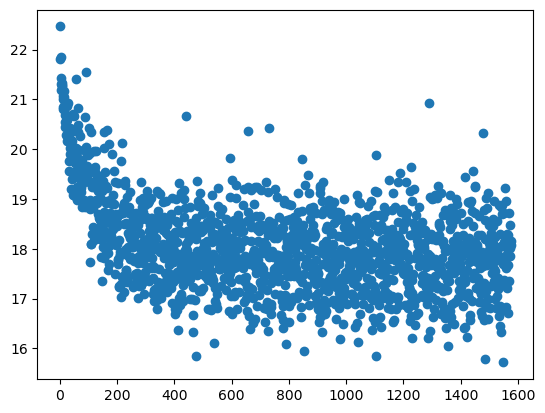

PyObject <matplotlib.collections.PathCollection object at 0x183b96e80>

In [30]:
PyPlot.scatter(collect(1:length(losslist)),losslist)

## Plot expected value of latent variables

In [31]:
zs = Transpose(cat(dims=2,map(x-> x[1],g.(testdata))...))

368×2 transpose(::Matrix{Float64}) with eltype Float64:
  1.6801     0.173146
 -0.228134   0.97053
 -0.303849   0.751263
 -0.345993   0.766837
 -0.503815   1.05394
  0.548814  -1.85173
  1.0767    -1.46462
  0.654523   0.708887
 -0.812562  -0.537289
 -0.700591  -0.0280486
  1.69472    0.244469
 -0.491251   0.575193
 -0.68117   -0.805467
  ⋮         
  1.58968    0.177958
 -0.21352    0.865916
 -0.538742  -1.38985
 -0.10981   -1.54727
  1.60922    0.178275
 -0.817186  -1.17965
 -0.419364   0.4186
 -0.470881   0.533243
  1.39305    0.202452
  1.61009    0.173498
 -0.759548   0.630825
 -0.346929   0.886362

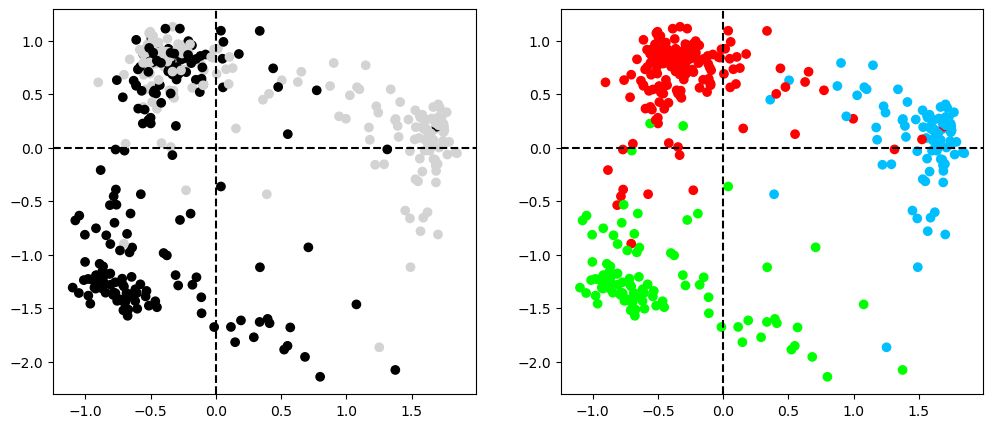

PyObject <matplotlib.lines.Line2D object at 0x184266730>

In [32]:
fig, ax = PyPlot.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[1].scatter(zs[:,1],zs[:,2],c=gcols)
ax[1].axhline(y = 0.0,c="black",linestyle="--")
ax[1].axvline(x = 0.0,c="black",linestyle="--")
ax[2].scatter(zs[:,1],zs[:,2],c=ccols)
ax[2].axhline(y = 0.0,c="black",linestyle="--")
ax[2].axvline(x = 0.0,c="black",linestyle="--")

In [33]:
zs = Transpose(cat(dims=2,map(x-> x[1],posteriorsample.(testdata))...))

368×2 transpose(::Matrix{Float64}) with eltype Float64:
  1.97486     0.968299
 -0.874706    0.744894
  0.478482    0.115199
  0.451526    0.540533
 -0.303609    0.177374
  0.604329   -1.72432
  1.31824    -2.11877
  0.22573     0.7314
 -0.510378   -0.178734
 -0.726464    0.407268
  1.90611    -0.00720228
 -0.507697    0.634503
 -1.57551    -0.522942
  ⋮          
  2.3635      1.67753
 -0.498107    0.208783
 -0.188409   -0.861165
 -0.16315    -2.0682
  1.45903    -0.538555
 -0.413655   -0.671397
 -0.741834   -0.0561469
 -0.589776    0.0682387
  1.40236    -0.756042
  2.13624    -0.0655862
 -1.41665     0.144885
  0.0614954   0.57965

## Left labelled according to group, right labelled according to celltype

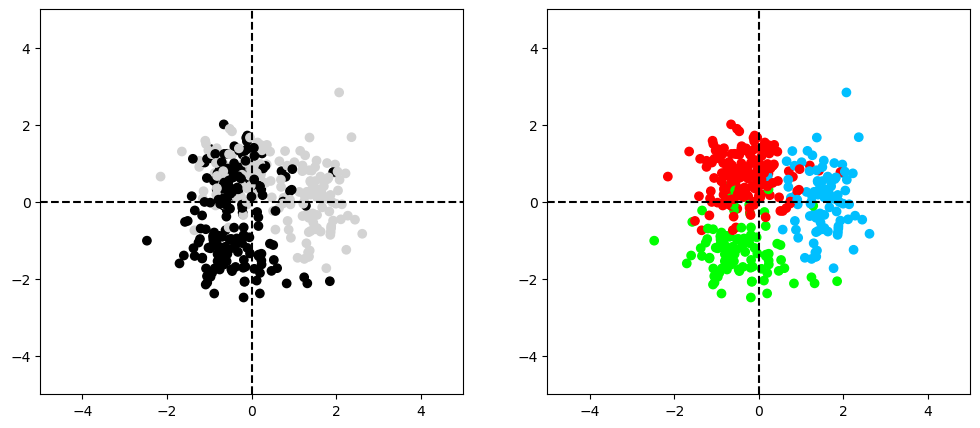

PyObject <matplotlib.lines.Line2D object at 0x184347340>

In [34]:
fig, ax = PyPlot.subplots(nrows=1, ncols=2, figsize=(12, 5))
scalepar = 5
ax[1].scatter(zs[:,1],zs[:,2],c=gcols)
ax[1].set_xlim(-scalepar,scalepar)
ax[1].set_ylim(-scalepar,scalepar)
ax[1].axhline(y = 0.0,c="black",linestyle="--")
ax[1].axvline(x = 0.0,c="black",linestyle="--")
ax[2].scatter(zs[:,1],zs[:,2],c=ccols)
ax[2].set_xlim(-scalepar,scalepar)
ax[2].set_ylim(-scalepar,scalepar)
ax[2].axhline(y = 0.0,c="black",linestyle="--")
ax[2].axvline(x = 0.0,c="black",linestyle="--")

# Draw samples from trained VAE

In [35]:
vaesamples = priorsample.(vcat([testdata for i = 1:10]...))

3680-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.8269663245760153, -0.6543917092606906], [0.2606029632031762, 0.29447751601454863, 0.22869473976526009, 0.22499737469290262, 0.24600085827706683, 0.7554126799716828, 0.7630308123573719, 0.7702871348461445, 0.7464179414466136, 0.7989588288816732  …  0.5717293765244377, 0.47076462518153295, 0.5058307568472085, 0.5724157868461354, 0.4798476332101389, 0.5022420833092006, 0.5575468079576825, 0.5493072873898884, 0.5364068858732116, 0.577409702941628])
 ([0.2961307245636859, -1.1629161916276305], [0.7311460221086722, 0.7490575717170204, 0.6608941391921078, 0.6851947537169972, 0.6932287487379215, 0.2163751763617511, 0.250200459455598, 0.2435847432828331, 0.2186767267470806, 0.258838602279863  …  0.5742540451759579, 0.43537288961175746, 0.5184359082308697, 0.5512400446860652, 0.495514906951679, 0.4836829622472426, 0.5375743095274902, 0.48342944391392123, 0.5912415402775116, 0.5832971681412438])
 ([0.4724494433146802, -1.780194269

In [36]:
vaepostsamples = posteriorsample.(vcat([testdata for i = 1:10]...))

3680-element Vector{Tuple{Matrix{Float64}, Matrix{Float64}}}:
 ([1.970501459524135; 0.9000149436824654;;], [0.034632452893102544; 0.0434283959046575; … ; 0.41518353465887436; 0.5656066674762553;;])
 ([0.6181201927244684; 1.1576067600724638;;], [0.672009901583317; 0.6386562276058353; … ; 0.4732447137245568; 0.45110562138598714;;])
 ([-0.9323107717101163; 0.15816613185003348;;], [0.9810766080668888; 0.9820119635577897; … ; 0.608733939082019; 0.4529062787336791;;])
 ([-0.8055315790617139; 1.2882407114839656;;], [0.9796909059596618; 0.9781727528350367; … ; 0.5487143948250398; 0.42100608964028213;;])
 ([-1.189804445632108; 0.6204936941385952;;], [0.9877910706270214; 0.9886212007662649; … ; 0.5980920520778705; 0.4243988423860565;;])
 ([0.4296307494701887; -1.2684554720652974;;], [0.6224772382386089; 0.657635709711957; … ; 0.5839118920723991; 0.6006588146796709;;])
 ([0.8245373976054846; -1.3659179304044031;;], [0.2902869436005827; 0.36465619523464643; … ; 0.5646932018958868; 0.63015051342303

In [37]:
vaesamples = vaepostsamples

3680-element Vector{Tuple{Matrix{Float64}, Matrix{Float64}}}:
 ([1.970501459524135; 0.9000149436824654;;], [0.034632452893102544; 0.0434283959046575; … ; 0.41518353465887436; 0.5656066674762553;;])
 ([0.6181201927244684; 1.1576067600724638;;], [0.672009901583317; 0.6386562276058353; … ; 0.4732447137245568; 0.45110562138598714;;])
 ([-0.9323107717101163; 0.15816613185003348;;], [0.9810766080668888; 0.9820119635577897; … ; 0.608733939082019; 0.4529062787336791;;])
 ([-0.8055315790617139; 1.2882407114839656;;], [0.9796909059596618; 0.9781727528350367; … ; 0.5487143948250398; 0.42100608964028213;;])
 ([-1.189804445632108; 0.6204936941385952;;], [0.9877910706270214; 0.9886212007662649; … ; 0.5980920520778705; 0.4243988423860565;;])
 ([0.4296307494701887; -1.2684554720652974;;], [0.6224772382386089; 0.657635709711957; … ; 0.5839118920723991; 0.6006588146796709;;])
 ([0.8245373976054846; -1.3659179304044031;;], [0.2902869436005827; 0.36465619523464643; … ; 0.5646932018958868; 0.63015051342303

In [38]:
zs = Transpose(cat(dims=2,map(x-> x[1],vaesamples)...))
xs = Transpose(cat(dims=2,map(x-> x[2],vaesamples)...))

3680×30 transpose(::Matrix{Float64}) with eltype Float64:
 0.0346325  0.0434284  0.0305023  0.025277   …  0.589514  0.415184  0.565607
 0.67201    0.638656   0.713759   0.660308      0.563426  0.473245  0.451106
 0.981077   0.982012   0.988606   0.984775      0.486224  0.608734  0.452906
 0.979691   0.978173   0.990879   0.984838      0.518053  0.548714  0.421006
 0.987791   0.988621   0.994507   0.991535      0.499145  0.598092  0.424399
 0.622477   0.657636   0.541117   0.565957   …  0.489833  0.583912  0.600659
 0.290287   0.364656   0.230473   0.238732      0.517319  0.564693  0.630151
 0.108207   0.133334   0.0949735  0.088774      0.571262  0.50675   0.592547
 0.992192   0.992901   0.993271   0.992989      0.41569   0.637381  0.453054
 0.978093   0.979289   0.980236   0.978796      0.439689  0.620046  0.476805
 0.106326   0.114471   0.097865   0.0833406  …  0.573019  0.438133  0.541487
 0.978756   0.979258   0.989462   0.984036      0.505085  0.582581  0.436808
 0.978481   0.9796

# Dichotomize samples 
You could also use the dichotomize function to cut the samples at a given quantile if you trained the VAE with count data.

In [39]:
zsbin = ifelse.(zs.>0,1,0)
xsbin = float.(xs .> rand(size(xs)...))

3680×30 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  0.0  1.0  0.0
 1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  0.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0     1.0  0.0  1.0  0.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  0.0  1.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0     1.0  1.0  1.0  1.0  0.0  1.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  …  1.0  0.0  0.0  1.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0     1.0  1.0  0.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0     1.0  1.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  …  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  0.0  1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0

## Infer Patterns between latent variables and observed variables with log-linear models

In [40]:
nvars = 12

12

In [ ]:
res = select_k_variables(nvars,[converttoleveldata([xsbin,zsbin])],evolution=true)

## Inspect the G-Squared matrix for each selected variable
The Matrix indicates the G-Squared statistic used for selecting a variable at a given iteration (here 12 iterations evaluated).
In the below stated example, g-squared matrix for iteration 6 (based on which the 6th variable is selected) is shown.

In [ ]:
res[1]

In [ ]:
ax = PyPlot.imshow(res[3][10],aspect="auto",cmap="binary")

## Here we infer the labels for the synthetic observations drawn from a VAE based on testdata.

In [ ]:
yhat = annotatesamplesbypattern(Transpose(hcat(testdata...)),xsbin[1:500,:],res[2],ccols)

## Here we inspect how synthetic observations were labeled

In [ ]:
pzs = zs[1:500,:]

In [ ]:
fig, ax = PyPlot.subplots(nrows=2, ncols=2, figsize=(12, 12))
scalepar = 5
ax[1].scatter(pzs[yhat.=="r",1],pzs[yhat.=="r",2],c=yhat[yhat.=="r"])
ax[1].set_xlim(-scalepar,scalepar)
ax[1].set_ylim(-scalepar,scalepar)
ax[1].axhline(y = 0.0,c="black",linestyle="--")
ax[1].axvline(x = 0.0,c="black",linestyle="--")

ax[2].scatter(pzs[yhat.=="deepskyblue",1],pzs[yhat.=="deepskyblue",2],c=yhat[yhat.=="deepskyblue"])
ax[2].set_xlim(-scalepar,scalepar)
ax[2].set_ylim(-scalepar,scalepar)
ax[2].axhline(y = 0.0,c="black",linestyle="--")
ax[2].axvline(x = 0.0,c="black",linestyle="--")

ax[3].scatter(pzs[yhat.=="lime",1],pzs[yhat.=="lime",2],c=yhat[yhat.=="lime"])
ax[3].set_xlim(-scalepar,scalepar)
ax[3].set_ylim(-scalepar,scalepar)
ax[3].axhline(y = 0.0,c="black",linestyle="--")
ax[3].axvline(x = 0.0,c="black",linestyle="--")

ax[4].scatter(pzs[:,1],pzs[:,2],c=yhat)
ax[4].set_xlim(-scalepar,scalepar)
ax[4].set_ylim(-scalepar,scalepar)
ax[4].axhline(y = 0.0,c="black",linestyle="--")
ax[4].axvline(x = 0.0,c="black",linestyle="--")

## Now with Tasic et al. data